# Compararação de performance dos classificadores: GaussianNB, Logistic Regression e k-NN

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [5]:
N = 1000
np.random.seed(42)
x = np.sort(5 * np.random.rand(N, 1), axis=0)
y = np.sin(x).ravel()
y_orig = np.sin(x).ravel()

# Add noise to targets.
y += 0.1*np.random.randn(N)

# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}]
knn = KNeighborsRegressor()

clf = GridSearchCV(knn, param_grid, cv=5, verbose=10, n_jobs=-1)
clf.fit(x_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1926s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0270s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s


{'n_neighbors': 20, 'weights': 'uniform'}
0.9796209553627315


[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0554s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.3s finished


Text(0.5, 1.0, "KNeighborsRegressor (k = 20, weights = 'uniform')")

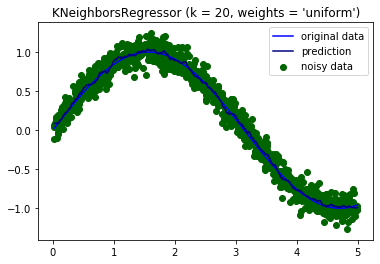

In [9]:
knn = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn.fit(x_train, y_train)
y_pred = knn.predict(x)

plt.scatter(x, y, color='darkgreen', label='noisy data')
plt.plot(x, y_orig, color='blue', label='original data')
plt.plot(x, y_pred, color='navy', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (20, 'uniform'))

In [11]:
error_train = np.sqrt(mean_squared_error(y_train, knn.predict(x_train)))
error_test = np.sqrt(mean_squared_error(y_test, knn.predict(x_test)))
print("MSE train = " + str(error_train))
print("MSE test = " + str(error_test))

MSE train = 0.09598216330992831
MSE test = 0.10331973237783179
